### EDA on Cross Selling Recommendations:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading and reading the data:

train_data = pd.read_csv("C:/Users/Dell/Downloads/Train2.csv/Train2.csv")

In [3]:
train_data.shape

(13393927, 49)

In [3]:
#Deleting the Unnamed column:

train_data = train_data.drop('Unnamed: 0', axis=1)

In [5]:
train_data.isnull().sum()

Date                    0
Customer_code           0
Employee_index          0
Country                 0
Gender                  0
Age                     0
Customer_join_date      0
Customer_index          0
Customer_seniority      0
Primary_customer        0
Customer_leave_date     0
Customer_type           0
Customer_relation       0
Residence_index         0
Foreigner_index         0
Spouse_index            0
Channel                 0
Deceased_index          0
Primary_address         0
Customer_address        0
Province_name           0
Activity_index          0
Gross_income            0
Segmentation            0
Saving_account          0
Guarantees              0
Current_accounts        0
Derivative_account      0
Payroll_account         0
Junior_account          0
More_private_account    0
Private_account         0
Private_plus_account    0
Short_term_deposits     0
Medium_term_deposits    0
Long_term_deposits      0
E_account               0
Funds                   0
Mortgage    

In [4]:
#Sum products purchased by each customer:

cols = ['Saving_account', 'Guarantees', 'Current_accounts', 'Derivative_account', 'Payroll_account', 'Junior_account','More_private_account', 'Private_account', 'Private_plus_account', 'Short_term_deposits', 'Medium_term_deposits', 'Long_term_deposits', 'E_account', 'Funds', 'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions_2', 'Direct_debit']

In [5]:
train_data['Product_sum'] = train_data[cols].sum(axis=1)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393927 entries, 0 to 13393926
Data columns (total 49 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Customer_code         int64  
 2   Employee_index        object 
 3   Country               object 
 4   Gender                object 
 5   Age                   int64  
 6   Customer_join_date    object 
 7   Customer_index        object 
 8   Customer_seniority    int64  
 9   Primary_customer      float64
 10  Customer_leave_date   object 
 11  Customer_type         object 
 12  Customer_relation     object 
 13  Residence_index       object 
 14  Foreigner_index       object 
 15  Spouse_index          object 
 16  Channel               object 
 17  Deceased_index        object 
 18  Primary_address       float64
 19  Customer_address      float64
 20  Province_name         object 
 21  Activity_index        object 
 22  Gross_income          float64
 23  Segme

In [6]:
#Group product sum into 3 groups according to product purchase:

# No_product (0 product purchase)

# 1_product (only 1 product purchase)

# More_than_1 (Purchased at least 2 products)


bins = [0, 1, 2, 20]

labels = ['No_product', '1_product', 'More_than_1']

train_data['Purchase_Group'] = pd.cut(train_data['Product_sum'], bins=bins, labels=labels, right=False)

In [11]:
train_data.head(5)

,Date,Customer_code,Employee_index,Country,Gender,Age,Customer_join_date,Customer_index,Customer_seniority,Primary_customer,...,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions_2,Direct_debit,Product_sum,Purchase_Group
0,2015-01-28,1375586,Not-employee,ES,Male,35,2015-01-12,Old-customer,6,1.0,...,0,0,0,0,0,0.0,0.0,0,1.0,1_product
1,2015-01-28,1050611,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,0,1.0,1_product
2,2015-01-28,1050612,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,0,1.0,1_product
3,2015-01-28,1050613,Not-employee,ES,Male,22,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,0,1.0,1_product
4,2015-01-28,1050614,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,0,1.0,1_product


### Analysis:

#### 1. Is there a correlation between the employee index and customer age.

In [7]:
#Correlation between Employee_index and customer age:

age_employee = train_data[['Age', 'Employee_index']]
age_employee

,Age,Employee_index
0,35,Not-employee
1,23,Not-employee
2,23,Not-employee
3,22,Not-employee
4,23,Not-employee
...,...,...
13393922,25,Not-employee
13393923,22,Not-employee
13393924,23,Not-employee
13393925,47,Not-employee


In [8]:
corr_coeff = age_employee.corr()
corr_coeff

,Age
Age,1.0


In [ ]:
# since the output is 1, it indicates the positive co-relation between Employee_index and customer age

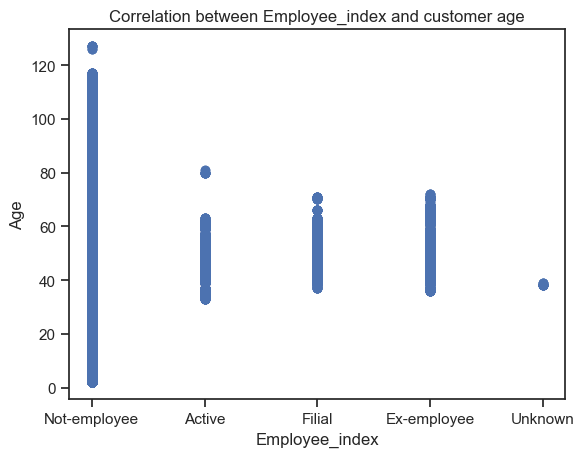

In [9]:
#scatter plot.

x = train_data['Employee_index']
y = train_data['Age']

plt.scatter(x,y)
plt.title("Correlation between Employee_index and customer age")
plt.xlabel('Employee_index')
plt.ylabel('Age')
plt.show()

#### 2. Define the correlation between customer age and gender?

In [10]:
##Correlation between customer age and gender:

gender_age = train_data[['Age', 'Gender']]
gender_age

,Age,Gender
0,35,Male
1,23,Female
2,23,Female
3,22,Male
4,23,Female
...,...,...
13393922,25,Female
13393923,22,Female
13393924,23,Female
13393925,47,Male


In [11]:
gender_corr = gender_age.corr()
gender_corr

,Age
Age,1.0


In [12]:
# since the output is 1, it indicates the positive co-relation between customer age and gender.

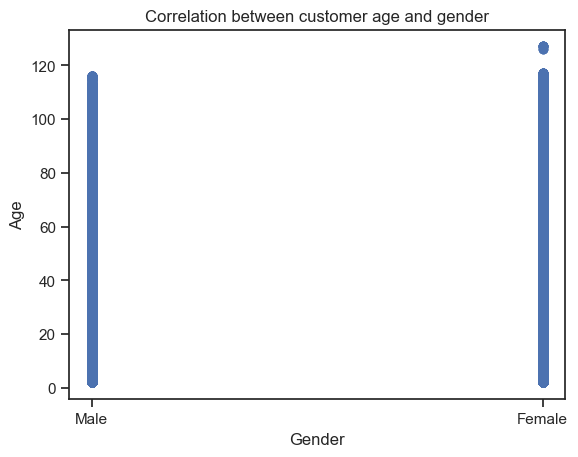

In [13]:
x = train_data['Gender']
y = train_data['Age']

plt.scatter(x,y)
plt.title("Correlation between customer age and gender")
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

#### 3. Define the correlation between  Customer_join_date  and  Customer Age?

In [14]:
#Correlation between Customer_join_date  and Age:
#change of datatype:

train_data['Customer_join_date'] = pd.to_datetime(train_data['Customer_join_date'])

In [15]:
join_date = train_data[['Customer_join_date', 'Age']]
join_date

,Customer_join_date,Age
0,2015-01-12,35
1,2012-08-10,23
2,2012-08-10,23
3,2012-08-10,22
4,2012-08-10,23
...,...,...
13393922,2013-08-14,25
13393923,2013-08-14,22
13393924,2013-08-14,23
13393925,2013-08-14,47


In [16]:
date_corr = join_date.corr()
date_corr

,Age
Age,1.0


In [ ]:
# since the output is 1, it indicates the positive co-relation between Customer_join_date and Age.

In [17]:
#group the year and calculate average age of the year:

Year_data = train_data.groupby(train_data['Customer_join_date'].dt.year)['Age'].mean()
Year_data

Customer_join_date
1995    59.161590
1996    58.452450
1997    56.370837
1998    54.376412
1999    53.707473
2000    54.416208
2001    54.480418
2002    52.670817
2003    51.087038
2004    50.298354
2005    50.186149
2006    49.029527
2007    49.546757
2008    50.284907
2009    47.668548
2010    47.780098
2011    30.516066
2012    30.011717
2013    28.899138
2014    29.817643
2015    30.079757
2016    39.203833
Name: Age, dtype: float64

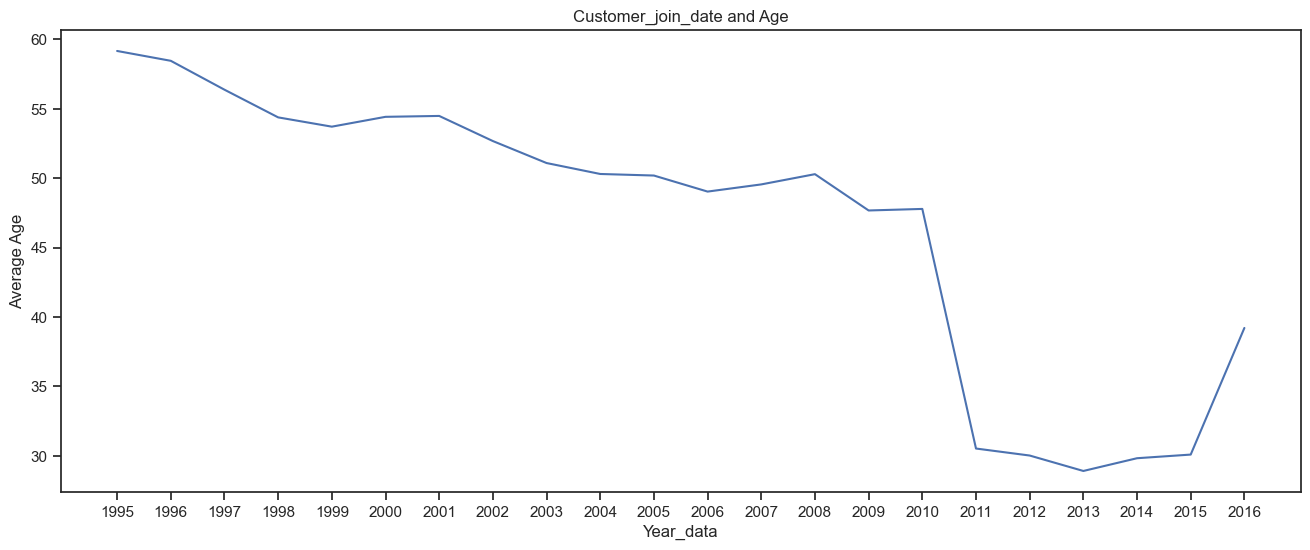

In [38]:
#creating the line chart:

plt.figure(figsize=(16,6))
plt.plot(Year_data.index , Year_data.values)
plt.title("Customer_join_date and Age")
plt.xlabel("Year_data")
plt.ylabel("Average Age")
plt.xticks(Year_data.index, Year_data.index)
plt.show()

#### 4. What is the correlation between Customer_code and Customer Age?

In [21]:
#Correlation between Customer_code and Age

customer = train_data[['Customer_code', 'Age']]
customer

,Customer_code,Age
0,1375586,35
1,1050611,23
2,1050612,23
3,1050613,22
4,1050614,23
...,...,...
13393922,1166766,25
13393923,1166765,22
13393924,1166764,23
13393925,1166763,47


In [22]:
customer_corr = customer.corr()
customer_corr

,Customer_code,Age
Customer_code,1.000000,-0.609102
Age,-0.609102,1.000000


In [ ]:
#The correlation coefficient between 'Customer_code' and 'Age' is -0.609102, indicating a negative correlation. 
#the diagonal columns represents coefficient between 'Customer_code' and 'Age' is 1.000000 which indicating a positive correlation.

<AxesSubplot:>

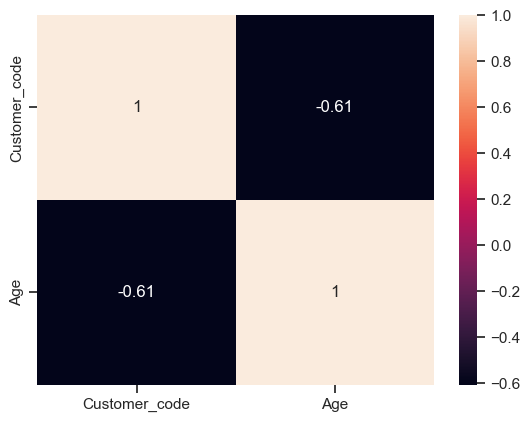

In [23]:
sns.heatmap(customer_corr, annot=True)

#### 5. Define the correlation between Customer Age and Product Sum? What kind relationship they have?

In [16]:
#Correlation between Age and Product sum:

age_product = train_data[['Age', 'Product_sum']].corr()
age_product

,Age,Product_sum
Age,1.000000,0.182969
Product_sum,0.182969,1.000000


In [ ]:
#The correlation coefficient between Age and Product sum is 1, is positive relation.
#the diagonal columns represents coefficient between is 0.182969, these two variables in that row and column.

#### 6. Define the correlation between Gender and Product Sum? What kind relationship they have?

In [17]:
#Correaltion between Gender and Product Sum:

gender_product = train_data[['Gender', 'Product_sum']].corr()
gender_product

,Product_sum
Product_sum,1.0


In [ ]:
#The correlation coefficient between gender and Product sum is 1, this indicates the positive relation.

##### Trends and patterns:

#### 7. What is the trend of Customer join date over the time?

In [25]:
#creating the line chart for Customer_join_date to show the trend in customer join over the time.

customer_count = train_data.groupby(train_data['Customer_join_date'].dt.year)['Customer_code'].count()
customer_count

Customer_join_date
1995      79244
1996     131725
1997     190933
1998     270148
1999     289416
2000     414235
2001     719095
2002     660714
2003     431307
2004     492408
2005     530629
2006     548793
2007     487654
2008     526263
2009     227816
2010     325981
2011    1241416
2012    1465702
2013    1514320
2014    1724231
2015    1065542
2016      56355
Name: Customer_code, dtype: int64

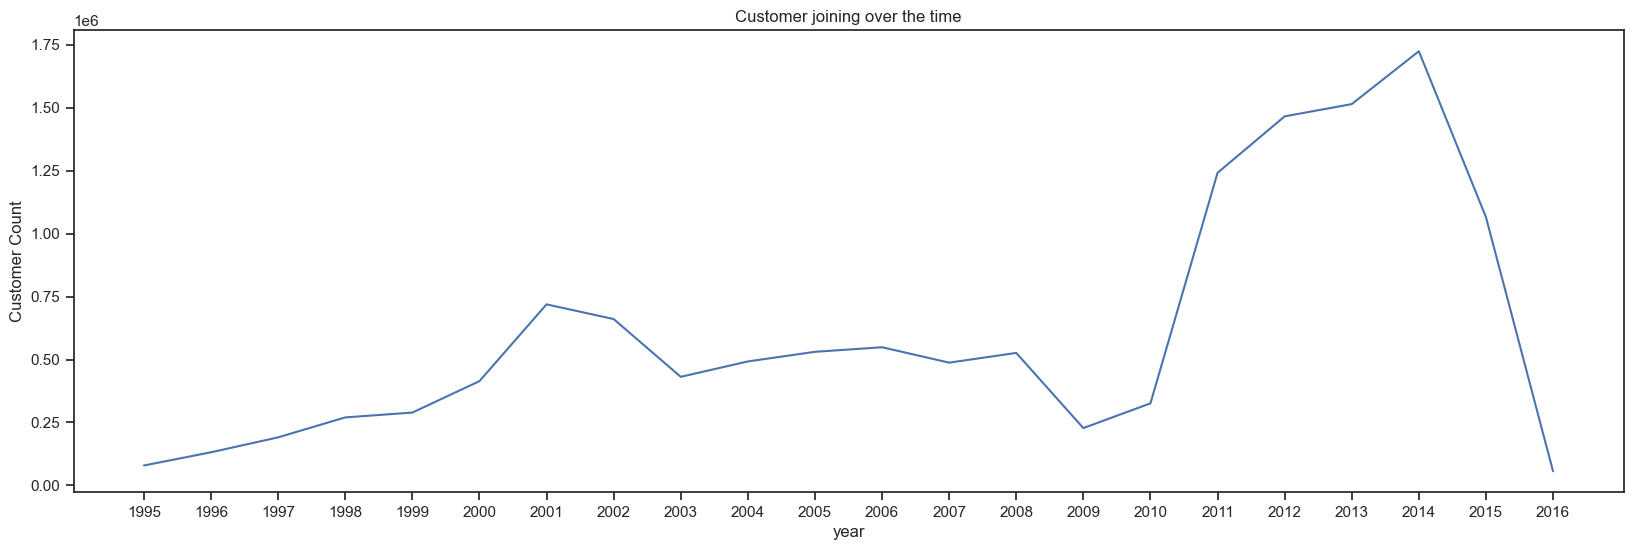

In [32]:
#creating the line chart:
plt.figure(figsize=(20,6))
plt.plot(customer_count.index,customer_count.values)
plt.title("Customer joining over the time")
plt.xlabel("year")
plt.ylabel("Customer Count")
plt.xticks(customer_count.index, customer_count.index)
plt.show()

#### 8. What is the age group that has purchased the highest number of products?

In [18]:
#creating the age-bins and creating the age group:

bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
train_data['age_group'] = pd.cut(train_data['Age'], bins=bins, labels=labels)

In [19]:
train_data['age_group']

0           20-40
1           20-40
2           20-40
3           20-40
4           20-40
            ...  
13393922    20-40
13393923    20-40
13393924    20-40
13393925    40-60
13393926    20-40
Name: age_group, Length: 13393927, dtype: category
Categories (5, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100']

In [20]:
#finding the age group which has purchased more products:

age_group_data = train_data.groupby(train_data['age_group'])['Product_sum'].sum().reset_index()
age_group_data

,age_group,Product_sum
0,0-20,433442.0
1,20-40,7820948.0
2,40-60,8869360.0
3,60-80,2144894.0
4,80-100,469701.0


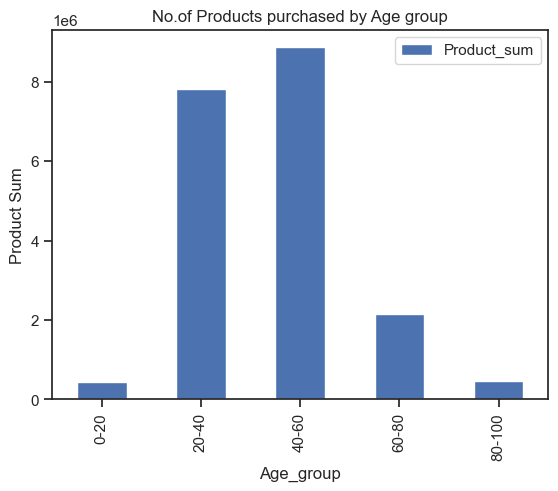

In [23]:
age_group_data.plot(kind="bar")
plt.title('No.of Products purchased by Age group')
plt.xlabel('Age_group')
plt.ylabel('Product Sum')
plt.xticks(age_group_data.index, ['0-20', '20-40', '40-60', '60-80', '80-100'])
plt.show()

In [ ]:
# Age group of 40-60 has purchased more products than the other groups.

#### 9. What is the difference in the product purchase among the genders? Are they  any particular product group that are more popular among one gender when compared to the other?

In [27]:
# gender-based differences in the products customers purchase:

male_data = train_data[train_data['Gender']=="Male"]
female_data = train_data[train_data['Gender']=="Female"] 

In [29]:
purchase_count_m = male_data.groupby('Purchase_Group')['Product_sum'].sum()
purchase_count_f = female_data.groupby('Purchase_Group')['Product_sum'].sum()

purchase_count_m
purchase_count_f

Purchase_Group
No_product           0.0
1_product      3519908.0
More_than_1    7916729.0
Name: Product_sum, dtype: float64

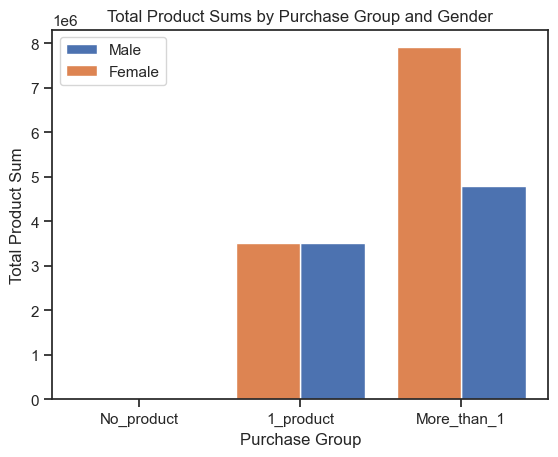

In [30]:
fig, ax = plt.subplots()
ax.bar(purchase_count_m.index, purchase_count_m.values, width=0.4, align='edge', label='Male')
ax.bar(purchase_count_f.index, purchase_count_f.values, width=-0.4, align='edge', label='Female')
plt.xlabel('Purchase Group')
plt.ylabel('Total Product Sum')
plt.title('Total Product Sums by Purchase Group and Gender')
plt.legend()
plt.show()

In [ ]:
#The project group of "more_than_1" has more male customers than female. 1_product customers count is equal in both genders.

#### Visualization on each columns:

In [33]:
#Visualization:

gender_count = train_data['Gender'].value_counts()
gender_count

Female    7299790
Male      6094137
Name: Gender, dtype: int64

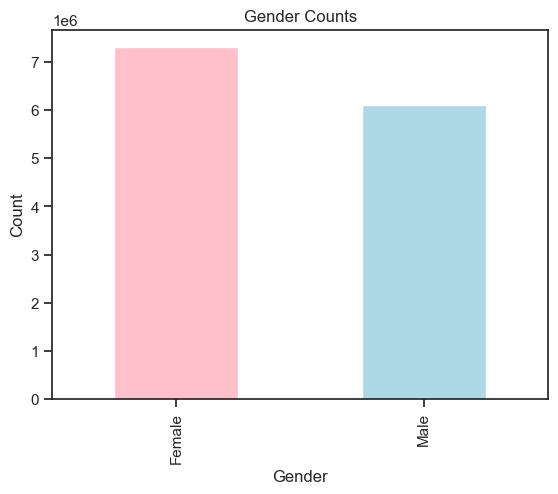

In [34]:
# Customer Join date and the Gender:

gender_count.plot(kind="bar", color=['pink', 'lightblue'])
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [35]:
#Employee_index:

employee_index = train_data['Employee_index'].value_counts()
employee_index

Not-employee    13385386
Ex-employee         3537
Filial              2512
Active              2475
Unknown               17
Name: Employee_index, dtype: int64

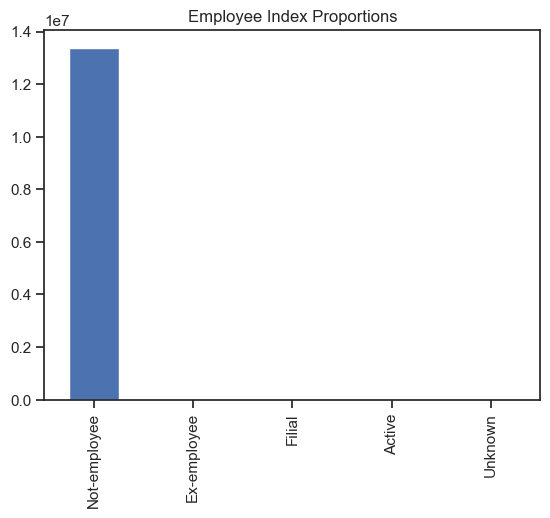

In [36]:
employee_index.plot(kind='bar')
plt.title('Employee Index Proportions')
plt.show()

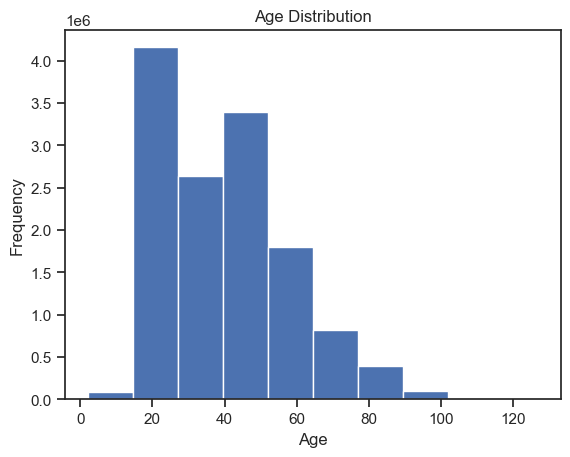

In [37]:
#age distribution:

train_data['Age'].plot.hist()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

In [24]:
#Product Categories:

category_count = train_data['Purchase_Group'].value_counts()
category_count 

1_product      7040309
More_than_1    3894196
No_product     2459422
Name: Purchase_Group, dtype: int64

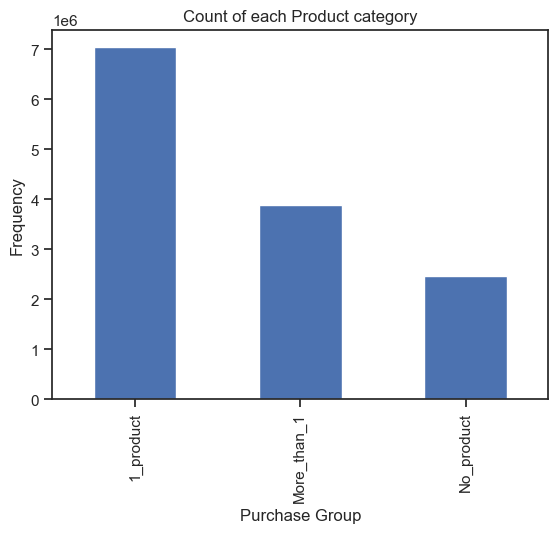

In [26]:
category_count.plot(kind='bar')
plt.title('Count of each Product category')
plt.xlabel("Purchase Group")
plt.ylabel("Frequency")
plt.show()

### Hypotheses:

 #### Are there any patterns in the gender and age of customers who purchase multiple products?

In [7]:
#step-1: H0,

print("HO = There is no signficant difference between Gender and Age of Customers who purchase Multiple products.")

HO = There is no signficant difference between Gender and Age of Customers who purchase Multiple products.


In [8]:
#step-2: Ha,

print("Ha = there is relationship between Gender and Age of Customers who purchase Multiple products.")

Ha = there is relationship between Gender and Age of Customers who purchase Multiple products.


 ##### ** We will conduct a two-sample t-test to test the hypothesis. The significance level is set to 0.05.

In [11]:
gender_count = train_data.Gender.value_counts()
gender_count

Female    7299790
Male      6094137
Name: Gender, dtype: int64

In [14]:
age_count = train_data.Age.value_counts()
age_count

23     774838
24     730523
22     729650
21     657747
25     468432
        ...  
116        63
114        17
117        14
127         8
126         3
Name: Age, Length: 118, dtype: int64

In [17]:
#finding the age mean():

mean_age =  train_data.Age.mean()
mean_age 

40.2128540793152

In [21]:
product_data = train_data[train_data['Product_sum'] > 1]
product_data

,Date,Customer_code,Employee_index,Country,Gender,Age,Customer_join_date,Customer_index,Customer_seniority,Primary_customer,...,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions_2,Direct_debit,Product_sum,Purchase_Group
21,2015-01-28,1050586,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,1,2.0,More_than_1
40,2015-01-28,1050670,Not-employee,ES,Female,37,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,1,2.0,More_than_1
41,2015-01-28,1050676,Not-employee,ES,Female,31,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,0,2.0,More_than_1
44,2015-01-28,1050686,Not-employee,ES,Female,39,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,1,3.0,More_than_1
45,2015-01-28,1050688,Not-employee,ES,Female,63,2012-08-10,Old-customer,35,1.0,...,0,0,0,0,0,0.0,0.0,0,2.0,More_than_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13393746,2016-05-28,1166712,Not-employee,ES,Female,34,2013-08-14,Old-customer,33,1.0,...,0,0,0,0,0,0.0,0.0,1,2.0,More_than_1
13393757,2016-05-28,1166666,Not-employee,ES,Male,30,2013-08-14,Old-customer,33,1.0,...,0,0,0,0,0,1.0,1.0,1,4.0,More_than_1
13393852,2016-05-28,1166836,Not-employee,ES,Female,27,2013-08-16,Old-customer,33,1.0,...,0,1,0,0,0,0.0,0.0,0,2.0,More_than_1
13393876,2016-05-28,1166753,Not-employee,ES,Male,22,2013-08-14,Old-customer,33,1.0,...,0,0,0,0,0,1.0,1.0,1,4.0,More_than_1


In [39]:
multi_product_data = product_data.groupby(['Customer_code', 'Gender', 'Age']).filter(lambda x: len(x) > 1)
male_data = multi_product_data[multi_product_data['Gender'] == 'Male']['Age']
female_data = multi_product_data[multi_product_data['Gender'] == 'Female']['Age']

In [40]:
mean_age_male = male_data.mean()
mean_age_female = female_data.mean()

In [44]:
t_statistic, p_value1 = stats.ttest_ind(mean_age_male, mean_age_female)
t_statistic, p_value1

(nan, nan)

In [41]:
t_statistic, p_value = stats.ttest_ind(male_data, female_data)

In [42]:
print("Mean age of male customers who purchase multiple products: ", mean_age_male)
print("Mean age of female customers who purchase multiple products: ", mean_age_female)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

Mean age of male customers who purchase multiple products:  47.6896381767134
Mean age of female customers who purchase multiple products:  48.73234931375291
t-statistic:  -69.44527456238242
p-value:  0.0


#Business Conclusion:

- After testing the two sample using t-test, from the results we conclude that there is statistical signifiance difference between the mean of Male and Female age.

- P-value after testing is 0.0, which indicates the probability of observing a difference as greater than or lesser than is very low.

- Therefore, we fail to except the null hypotheses H0. Hence we assume that the alternative hypotheses is true, as it suggests that there is significant difference between two variables.


### Recommendations:

- After analysing the data, the mean age of customer in every year since they have joined shows that in 1995 there was increase in customers joining the bank, the output specify that there has be fluctuation in customer joing the bank over the year.

- The correlation between the columns like  Employee_index and customer age, customer age and gender, Customer_join_date and Customer Age,  Customer Age and Product Sum, Gender and Product Sum has positive correlation, which indicates when one Variable/ Column increases than the other Variable/Column also increases. 

- Correlation between Customer_code and Age has negative realtion which incidates that there is no linear realtionship between these two variables.

- When the Trend is analysed between customers and their joining the bank, the cahrts shows the number of customers joining the bank over the years. In the year 2014, there are maximum customers joined. Based on this we can use it for making the strategies and plan to attract more customers towards bank.

- After grouping the age into age_group and analysing it has been observed that, Age Group of 40-60 has purchased more products than others age groups. 

- The Product Group of "More_than_1" has more male customers, whereas 1_Product group has equal purchases among Male and Female Genders. Hence we need focus on those customers who has brought only 1 Products in order to increase the New customers, focus Cross selling of more than 1 products among the existing customers and increase revenue, profits in Credit Union.